<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/informe_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripcion Del Problema

Reducción de problemas

En teoría de la computación e complejidad computacional, es lograr que un problema sea la entrada de otro problema que es la solucion al problema original.

Para ser mas especifico debemos ver la imagen

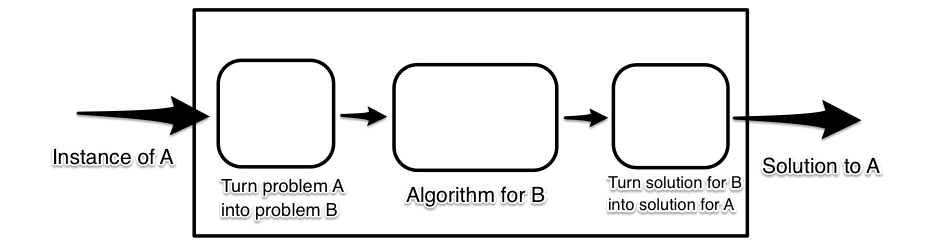

Al observar la imagen podemos ver, que para resolver el **problema A**
que la entrada A se transforma en la entrada del **problema B**, Luego dentro del algoritmo que resuelve el problema A se llama un algoritmo que resuelve el **problema B** este retornara la solución que necesita el **problema A**.

Podemos apreciar que el **problema A** se redujo al **problema B** y podemos entender que **A** no es más difícil que resolver **B**.
 

Tambien podemos decir que el problema es de estadistica.


El **estadístico de orden** kº es igual al k-ésimo valor más pequeño de una **muestra estadística**. Junto con los estadísticos de rango, los estadísticos de orden son una de las herramientas fundamentales de la estadística no paramétrica y de inferencia.

Hay casos especiales importantes de los estadísticos de orden: el **mínimo** y el **máximo** valor de una muestra,la **mediana** y otros **cuantiles de muestra**.

El **problema de selección** se encuentra directamente relacionado con estos estadísticos.



# 2.Select

Mientras que Randomized-select selecciona el pivote aleatoriamente, Select aplica la siguiente rutina (**Pivot-selection**) para escogerlo:

1. Divide el conjunto de $n$ elementos en $\lceil n/5 \rceil$ grupos de 5 elementos cada uno (el último grupo queda con menos elementos)
2. Encuentra la **mediana** de cada grupo aplicando el algoritmo **InsertionSort** para ordenarlos.
3. Se aplica **Pivot-selection** recursivamente para encontrar la mediana $m$ de las $\lceil n/5 \rceil$ medianas identificadas el paso previo. 
4. Luego, $m$ será el pivote usado por el método **Partition**.

Gracias a esta selección del pivote, el método **Select** logra un **tiempo de ejecución en el peor caso** de $O(n)$, creo que no esta demas decir que el mejor caso tambien es $O(n)$.

## 2.1Ejemplo Paso a paso

Recivimos una arreglo de entrada:

`A = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]`

Debemos buscar un elemto especifico k-inesimo menor.

i = 2

ahora debemos escoger un pivot

El arreglose divide en grupos de 5

`[12, 3, 2, 9, 17]`  `[0, 21, 7, 5, 4]`  `[8, 11, 6, 15, 1]`

Se ordenan los arreglos usando un algoritmo visto anteriormente insertionsort

`[2, 3, 9, 12, 17]`  `[0, 4, 5, 7, 21]`  `[1, 6, 8, 11, 15]`

Se crea una arreglo de medianas

`[9, 5, 8]`

Se vuelve a utilizar insetion sort y se escoge la mediana que seria el pivot

`[5, 8, 9]`

pivot = 8

El arreglo se original se divide en 2 llevando los menores al pivot a la izaquierda y los mayores a la derecha.

`[3, 3, 0, 7, 5, 4, 6, 1]  [8] [12, 9, 17, 21, 8, 11, 5]`

En el caso que el pivot se igual i se retorna el pivot

Ahora todo lo visto anterirormente se repite para la parte izquierda y derecha
hasta encontrar el valor necesario.




## 2.2Codigo

In [289]:
import random
def insertionSort(arr,cont):

  n = len(arr)

  
  for i in range(1, len(arr) ):
      j = i           

      while arr[j - 1] > arr[j] and j > 0:
          cont[3]=cont[3]+1
          arr[j - 1], arr[j] = arr[j], arr[j - 1]
          j -= 1
  return arr 

In [231]:
def pivotSelection(arr,cont,verbose):

  if (len(arr) == 1):
    return arr[0]
  cont[2] = cont[2] + 1


  subarreglos = chunked(arr,5)

  #full_chunks = [subarr for subarr in subarreglos if len(subarr) == 5]

  subArrOrdenados = [insertionSort(chunk,cont) for chunk in subarreglos]
  if(verbose == True):
    print("Subarreglos Ordenados", subArrOrdenados)
  arrMed = [] 

  for chunk in subArrOrdenados:
    med = len(chunk)//2
    arrMed.append(chunk[med])
 
  return pivotSelection(arrMed,cont,verbose)

def chunked(l, chunk_size):
  return [l[i:i + chunk_size] for i in range(0, len(l), chunk_size)]

In [278]:

def partition(array, l, h,cont,mediana):  

    comien = 0
    fin = len(array)-1
    piv = mediana

    cont[0] = cont[0] +1
    while comien < fin:

        while comien < h and array[comien] < piv:
            comien = comien + 1
            if comien < h:
              cont[1] = cont[1] +1

        
        while l < fin and array[fin] >= piv:
            cont[1] = cont[1] +1
            fin = fin - 1    
            if l < fin:
              cont[1] = cont[1] +1

       
        if comien < fin:
          array[comien], array[fin] = array[fin], array[comien]
          cont[1] = cont[1] +1
        else:
          cont[1] = cont[1] +1



    var = array.index(piv)

    if (array[comien] > piv):
      cont[1] = cont[1] +1
      array[comien], array[var] = array[var], array[comien]
    else:
      cont[1] = cont[1] +1

    return comien


In [312]:
def select(arr,com,fin,k,cont,verbose):
  cont[0] +=1

  med = pivotSelection(arr,cont,verbose)
  if(len(arr) != 0):
    if verbose ==True:
      print("Mediana de medianas: ", med)
    
    pivot= partition(arr,com,fin,cont,med)
    if verbose ==True:
      print("Pivote: ", pivot)
      
    if pivot == k -1:
      cont[4] = cont[0] + cont[1] + cont[2] + cont[3]
      return med;
    if pivot > k -1 :
      cont[0] = cont[0] +1
      cont[4] = cont[0] + cont[1] + cont[2] + cont[3]
      return select(arr[:pivot],com,len(arr),k ,cont,verbose)
    if pivot != k -1 and pivot < k -1 :
      if pivot < k -1:
        cont[0] = cont[0] +1
        cont[4] = cont[0] + cont[1] + cont[2] + cont[3]
        return select(arr[pivot + 1:],com,len(arr),k -pivot-1 ,cont,verbose)
  else:
    return arr[0]


arr = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]
cont = [0,0,0,0,0]

In [317]:
cont = [0,0,0,0,0]

arr = [3, 2, 9, 0, 7, 5, 4, 8, 6, 1]
n = len(arr)
k = 6
select(arr, 0, n - 1, k,cont,verbose = False)
print("Dato buscado: ",select(arr, 0, n - 1, k,cont,verbose = False))
print("Comparaciones insertion-sort: ", cont[3])
print("Comparaciones pivot-Selection: ", cont[2])
print("Comparaciones partition: ", cont[1])
print("Comparaciones select: ", cont[0])
print("\n")
print("Total comparaciones: ", cont[4])


Dato buscado:  5
Comparaciones insertion-sort:  31
Comparaciones pivot-Selection:  8
Comparaciones partition:  54
Comparaciones select:  10


Total comparaciones:  103


## verbose

In [314]:
#Arreglo quiz 10
arr = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]
cont = [0,0,0,0,0]
print(select(arr, 0, n - 1, k,cont,verbose = True))

Subarreglos Ordenados [[2, 3, 9, 12, 17], [0, 4, 5, 7, 21], [1, 6, 8, 11, 15]]
Subarreglos Ordenados [[5, 8, 9]]
Mediana de medianas:  8
Pivote:  8
Subarreglos Ordenados [[1, 2, 3, 4, 6], [0, 5, 7]]
Subarreglos Ordenados [[3, 5]]
Mediana de medianas:  5
Pivote:  5
5


# 3.Explique por qué el algoritmo es correcto (prueba de correctitud).

Asumiendo que partition, pivotSelection e insertionSort es correcto.

**caso 1 (k = q)**

Para este caso base, asumimos que se obtiene el pivot correctamente y contiene el mismo valor que el k-ésimo.



**caso 2 (k < q)**

Sabiendo que la función partition va a dividir en dos y funciona correctamente además el select es un algoritmo recursivo, entonces el algoritmo select trabajara con arreglos más peque;os hasta llegar al caso base.

En el caso de que el elemento k-ésimo sea menor a q(pivot), se trabajara con el arreglo **izquierdo** que se peticionará y se escogerá nuevamente un pivot de la mediana de medianas que hará que se vuelva a dividir el arreglo en 2 hasta que se cumpla el caso base.


**caso 3 (k > q)**

Sabiendo que la función partition va a dividir en dos y funciona correctamente además el select es un algoritmo recursivo, entonces el algoritmo select trabajara con arreglos más peque;os hasta llegar al caso base.

En el caso de que el elemento k-ésimo sea menor a q(pivot), se trabajara con el arreglo **derecho** que se peticionará y se escogerá nuevamente un pivot de la mediana de medianas que hará que se vuelva a dividir el arreglo en 2 hasta que se cumpla el caso base.

Es importante resaltar que el k-ésimo elemento no va a estar a un solo lado en cada iterción es nos lleva a darnos cuenta de que el caso 3 y el caso 2 se complementan durante la ejecución del algoritmo select.

# 4.tiempo de ejecución

A continuacion veremos una ecuacion para obtener la complejidad del algoritmo .

Debemos darle valores a la ecuacion y asumir que T(n) < C*n.

O(n) --> Insetrin sort

n/5 --> Particion del arreglo en 5

7n/10 --> peor caso 

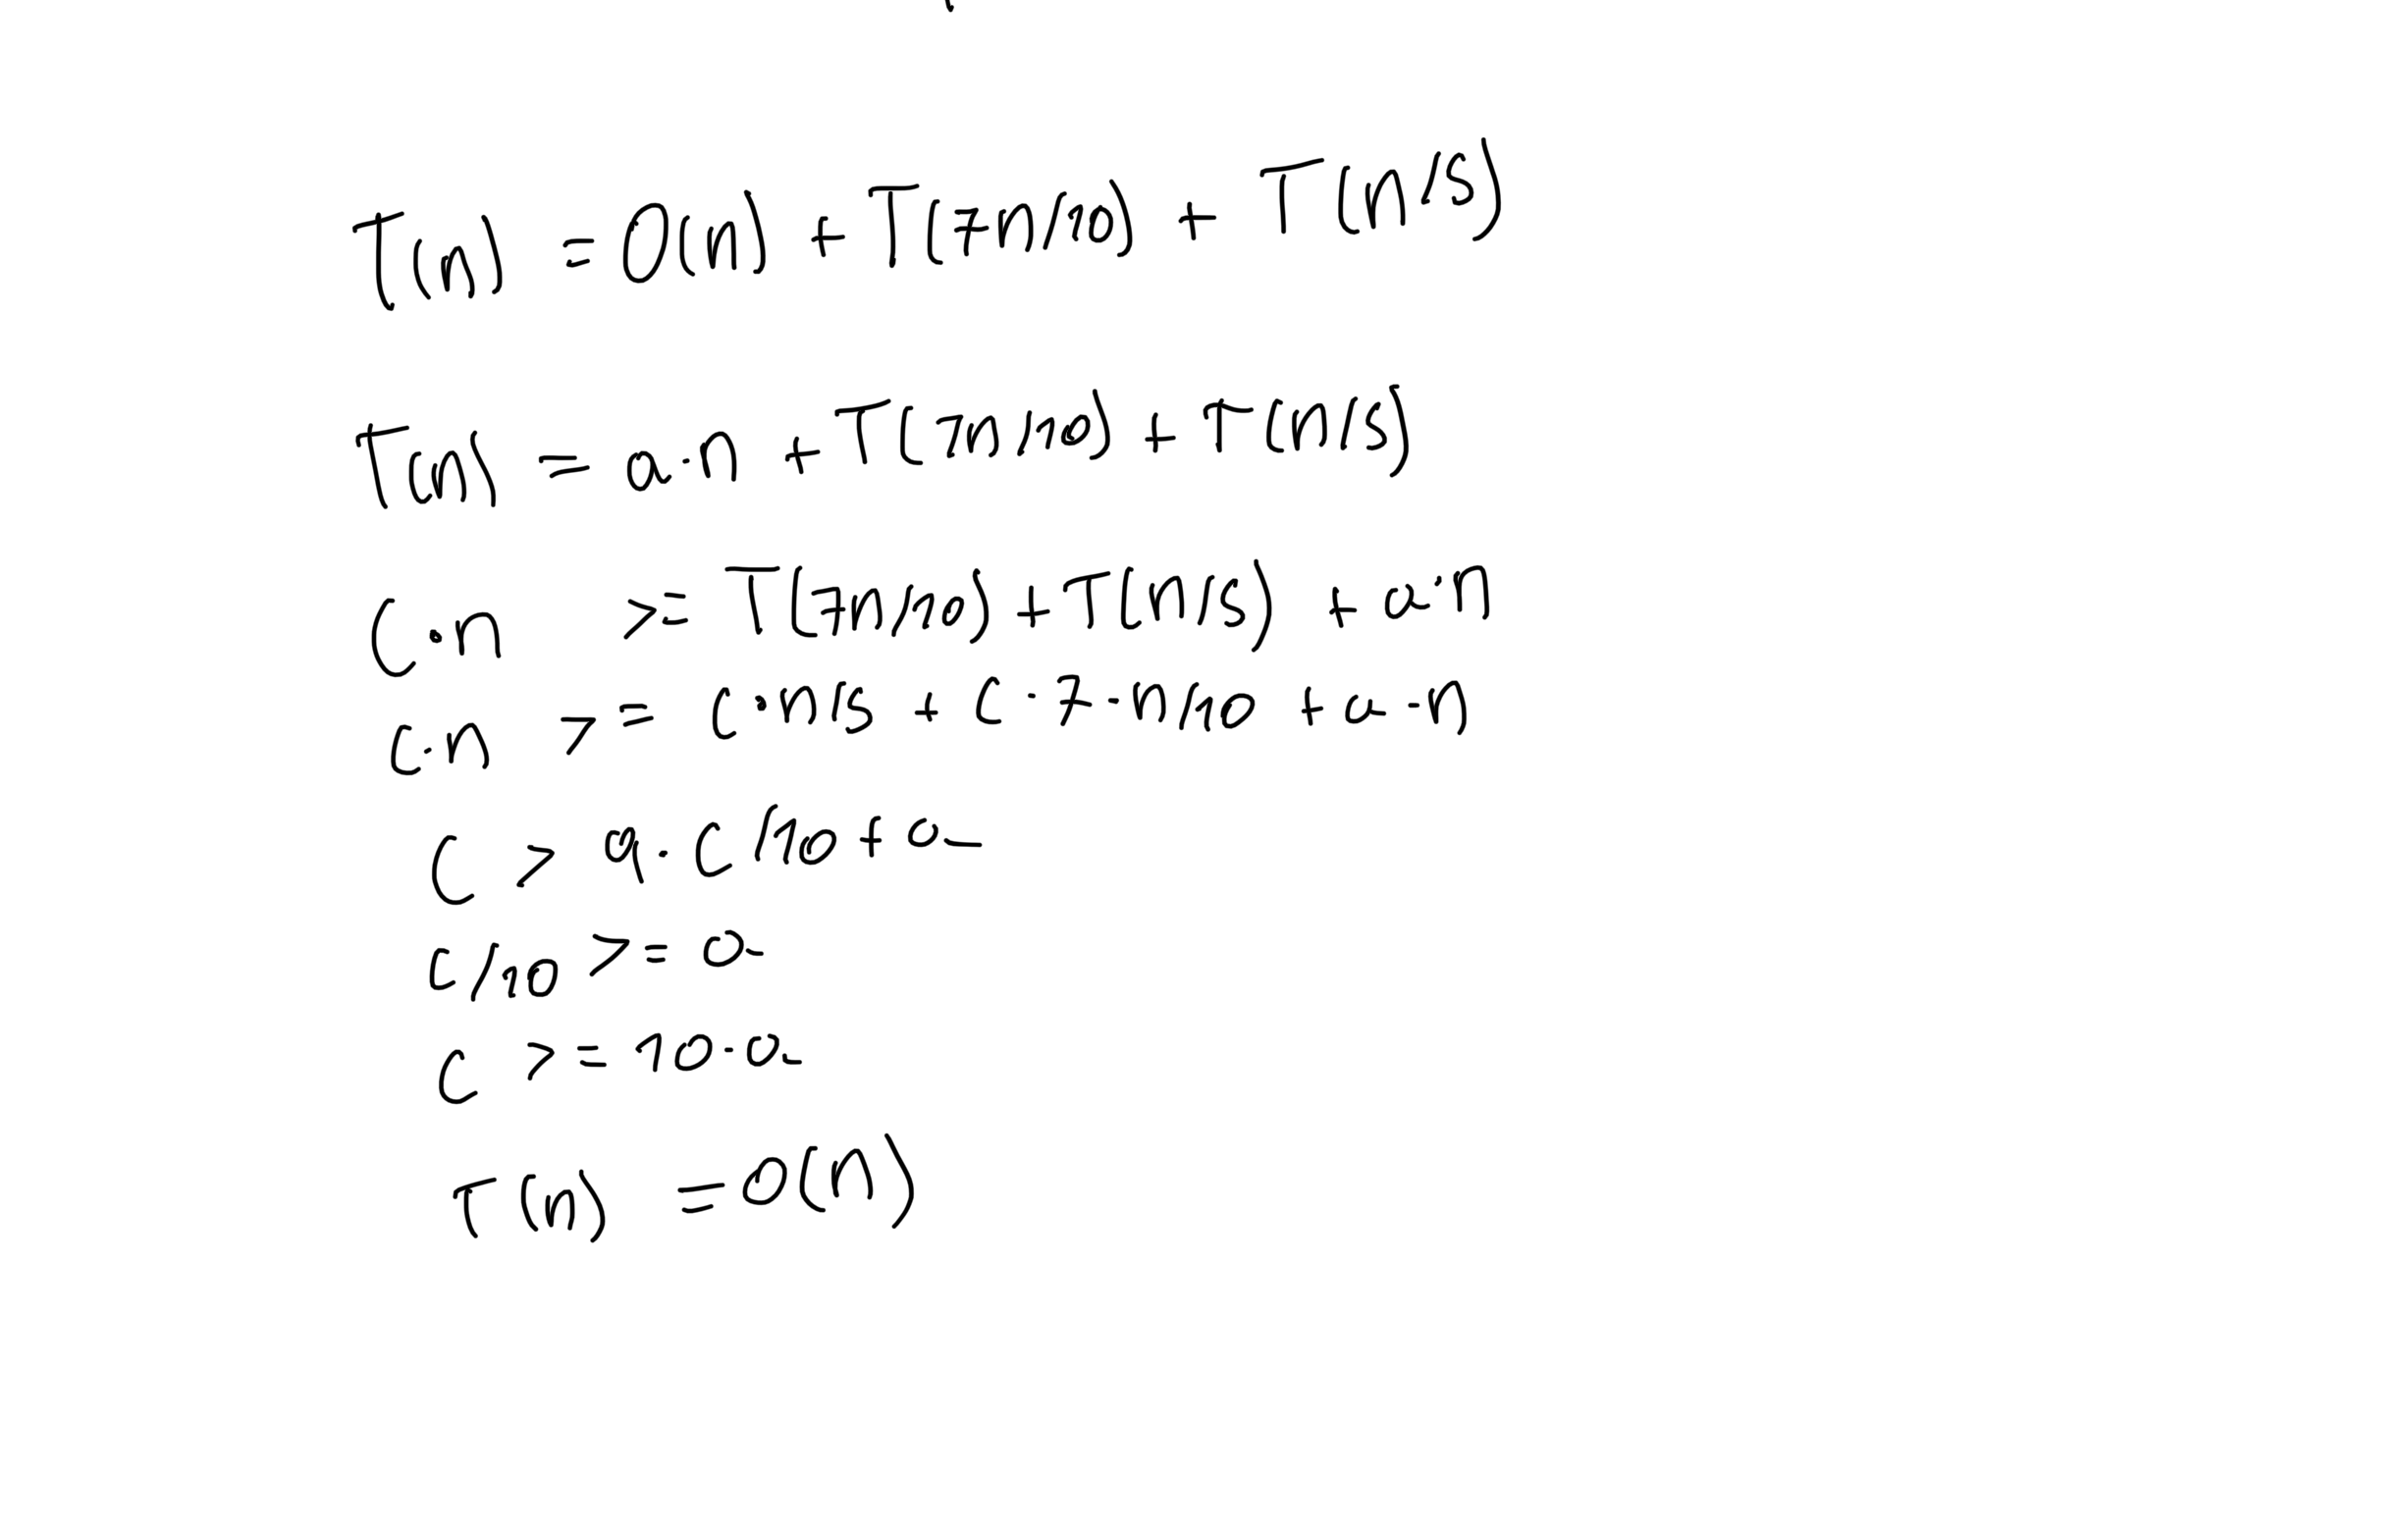

Si alanlizamos el resultado nos queda una constante lo que nos indica que el tiempo de ejecucion T(n) = O(n)

Encontrar la mediana de las medianas toma un tiempo de O(n), n (largo del arreglo), se divide en subarreglos de 5 elementos cada uno (n/5). Llamaremos LM al subarreglo que contiene las medianas, la mitad de los n/5 elementos en LM son menores a la mediana de LM ((n/5)/2 = n/10). Por cada uno de los n/10 elementos, dos de ellos son menores a la mediana de medianas, lo que nos deja que 3n/10 son menores a la mediana de medianas. Si nos planteamos el peor caso, se llamaria recursivamente al subarreglo con 7n/10 elementos en cada llamada recursiva.

Podemos ver que a traves de trabajo algebraico sobre la fórmula, obtenemos un tiempo de ejecución de O(n) tanto en su mejor como peor caso.

# **5.Experimentos**

In [203]:

import numpy as np

def Partition(a, p, r):

    x = a[r]
    i = p - 1
    for j in range(p, r):
        if a[j] <= x:
            i = i + 1
            
            a[i], a[j] = a[j], a[i]

    a[i+1], a[r] = a[r], a[i+1]

    return i + 1

def RandomizedPartition(a, p, r):
    
    i = np.random.randint(p, r)
    a[i], a[p] = a[p], a[i]
    return Partition(a, p, r)

def Randomizedselect(a, p, r, i):
    if p == r:
        return a[p]
    q = RandomizedPartition(a, p, r)
    
    k = q - p +1
    if i == k:
        return a[q]
    elif i < k:
        return Randomizedselect(a, p, q - 1, i)
    else:
        return Randomizedselect(a, q + 1, r, i - k)


array = [12, 3, 2, 9, 17, 0, 21, 7, 4, 8, 11, 6, 15, 1]
i = 5
r = len(array) - 1
p = 0
Randomizedselect(array, p, r,i)

4

## **Mejor y peor caso teóricos.**

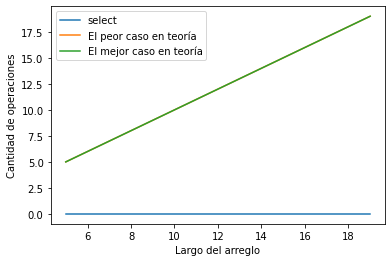

In [271]:
from itertools import count
import matplotlib.pyplot as plt 
import random

x=[n for n in range(5,20)] 
y1=[n for n in range(5,20)] # peor caso
y2=[n for n in range(5,20)] # mejor caso
y=[]; 


for n in range(5,20):

  k = random.randint(0, n-1)
  cont = [0,0,0,0,0]
  a = random.sample(range(1, 100), n)
  select(a, 0, len(a)-1, 3,cont,verbose = False)
  y.append(cont[4])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["select", "El peor caso en teoría", "El mejor caso en teoría"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

## **Randomized-select vs Select**

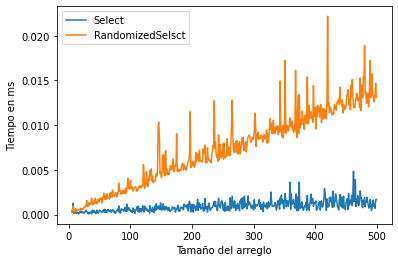

In [315]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy


x=[]; y=[]
y1=[]

for n in range(5,500):
  i = random.randint(0, n-1)
  a = random.sample(range(1, 1000), n)
  cont = [0,0,0,0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  #t1 = repeat(setup="from __main__ import quickSort_der", stmt=f"quickSort_der({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import RandomizedSelsct", stmt=f"RandomizedSelsct({a},{0},{n-1},{3})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import select", stmt=f"select({a},{0},{n-1},{3},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Select", "RandomizedSelsct"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

# **6.Análisis experimentos**

## **Grafico 1:**



Como podemos apreciar en nuestro graficó número 1 se observa un crecimiento lineal, esto es debido a que la suma de los tiempos de ejecución del insertion-sort, partition y select es O(n) entonces se deduce que la cantidad de operaciones depende totalmente de la cantidad de elementos.

## **Grafico 2:**


Creí que el select es más rápido que el Randomized-select, esto es producto del pivote.

Esto no es así, en el caso Randomized-select usa un pivote aleatorio y aunque no sea el pivote ideal, es más rápida la selección de pivote lo que hace que el algoritmo Randomized-select sé mucho más eficiente que el select, ya que al select se le deben sumar el tiempo de ejecución.

en el gráfico podemos ver unos peak repentinos, se puede seguir diciendo que son actitudes impredecibles del procesador.